# Tarea Semanal 2: Algoritmo para calcular la DFT
## Magdalena Noé
Se desarrollo un algoritmo que calcula la transformada discreta de Fourier (DFT) de una señal otorgada.
Para ello se implementan 2 fors anidados que recorren cada valor de la señal y calculan la sumatoria X[n] * e^fase siendo e^fase el termino conocido como twiddle factor.

### Parametros
- xx : señal de entrada a la cual se desea calcular su DFT

### Retorna
- XX : matriz DFT de igual dimension que la señal de entrada

#### Librerias:

In [8]:
import numpy as np
import matplotlib.pylab as plt

# mi_funcion_DFT

In [9]:
def mi_funcion_DFT(xx):
    xx = np.asarray(xx, dtype=float).flatten()  # Asegura vector 1D real
    len_xx = len(xx)
    XX = np.zeros(len_xx, dtype=complex) # Inicializo arr con ceros

    for m in range(len_xx): # Pasa por cada valor de la señal
        for n in range(len_xx):
            fase = -2j * np.pi * m * n / len_xx # e^fase = cos(2*pi*(kn/N)) + j*sin(2*pi*(kn/N)) = "twiddle factor"
            XX[m] += xx[n] * np.exp(fase) # Sumatoria: X[n] * e^fase

    return XX

# Testeo
Alimentaremos una señal seno a la función y graficaremos el resultado

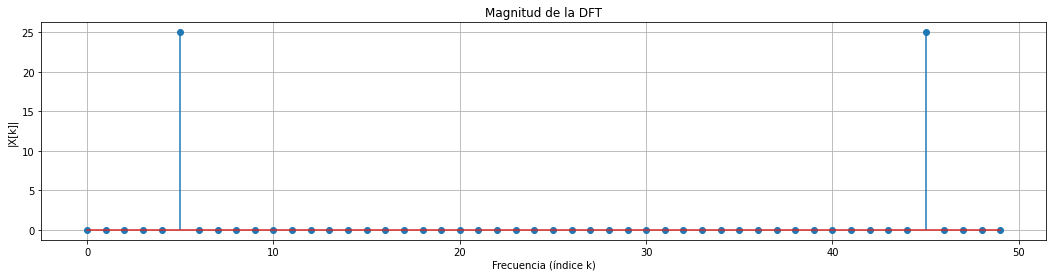

In [12]:
def mi_funcion_sen(vmax=1,dc=0,ff=1,ph=0,nn=1000,fs=1000):
    #t = np.linspace(0, nn/fs, nn, endpoint=False) #False evita que se incluya valor limite como ultimo valor (Recomendado por chatGPT)
    t = np.arange(nn) / fs
    sin = vmax * np.sin(t*2*np.pi*ff + ph) + dc
    return t, sin

#-----------------------------------------------------------

N = 50  # Muestras del ADC
fs = N  # Frecuencia de muestreo del ADC
f0 = 5  # Frecuencia de la señal seno
t, xx = mi_funcion_sen(nn = N, fs = fs, ff=f0)

XX = mi_funcion_DFT(xx)

plt.figure(figsize=(18, 4))  # ancho x alto (en pulgadas)
plt.stem(np.abs(XX), use_line_collection=True) # grafico para funciones discretas
plt.title("Magnitud de la DFT")
plt.xlabel("Frecuencia (índice k)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

### Introduciendo ruido
Ahora modifiquemos la señal para añadir ruido uniforme con varianza igual a 4

σ^2 = (b−a)^2 / 12

σ^2 = 4 ⇒ (b−a)^2 = 48 ⇒ b−a= 48^1/2

​Plantearemos ruido simetrico por lo que a = b

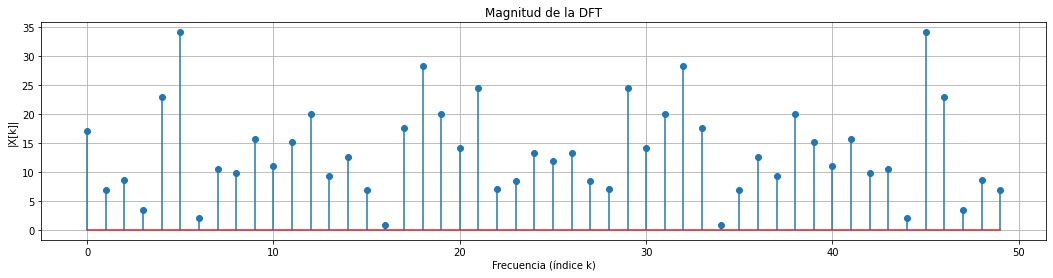

In [15]:
ruido = (np.random.random_sample(size=t.shape) - 0.5) * np.sqrt(48)

xx_con_ruido = xx + ruido

XX = mi_funcion_DFT(xx_con_ruido)

plt.figure(figsize=(18, 4))  # ancho x alto (en pulgadas)
plt.stem(np.abs(XX), use_line_collection=True) # grafico para funciones discretas
plt.title("Magnitud de la DFT")
plt.xlabel("Frecuencia (índice k)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()

# FFT (Fast Fourier Transform)
Repetiremos los experimentos pero reemplazaremos el uso de la DFT con la FFT

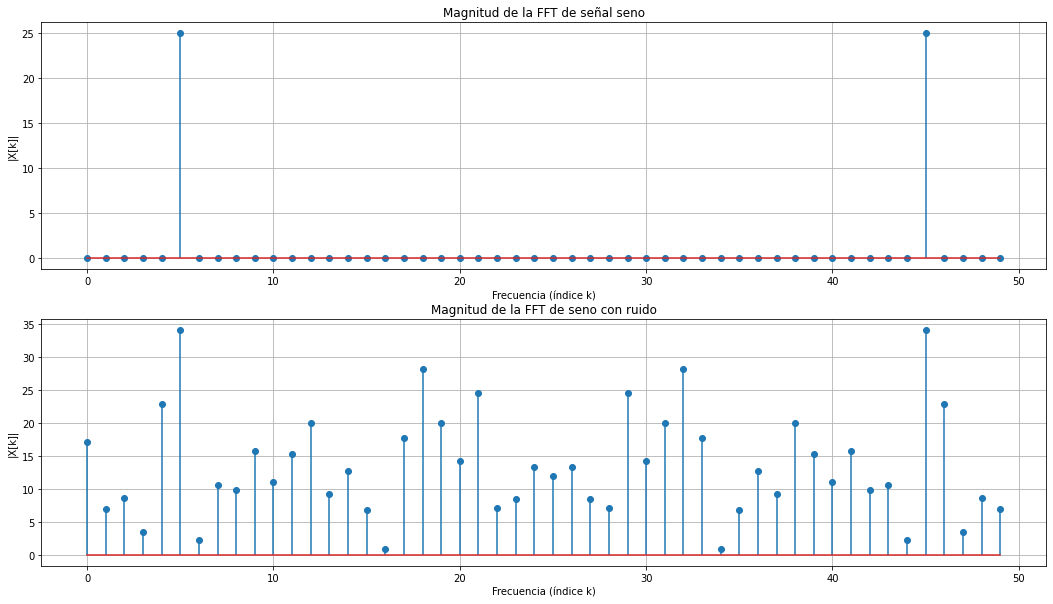

In [ ]:
XX_fft = np.fft.fft(xx) # Invoco FFT en vez de DFT
XX_fft_ruido = mi_funcion_DFT(xx_con_ruido) # Introduzco ruido

plt.figure(figsize=(18,10))
plt.subplot(2, 1, 1)
plt.stem(np.abs(XX_fft), use_line_collection=True)
plt.title("Magnitud de la FFT de señal seno")
plt.xlabel("Frecuencia (índice k)")
plt.ylabel("|X[k]|")
plt.grid(True)

plt.subplot(2, 1, 2)
plt.stem(np.abs(XX_fft_ruido), use_line_collection=True)
plt.title("Magnitud de la FFT de seno con ruido")
plt.xlabel("Frecuencia (índice k)")
plt.ylabel("|X[k]|")
plt.grid(True)
plt.show()